# Open Problem

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import pandas as pd
d=pd.read_csv("train.csv",encoding='utf8')
d

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [2]:
d['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [3]:
d['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

<AxesSubplot:ylabel='year'>

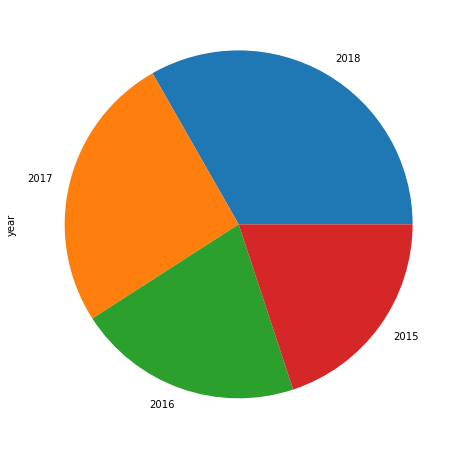

In [32]:
plt.figure(figsize=(10,8))
d['year'].value_counts().plot.pie()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

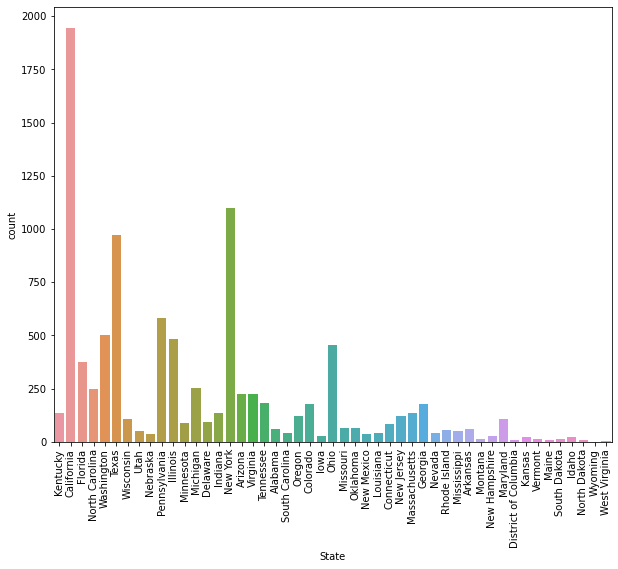

In [9]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
sns.countplot('State',data=d)

In [11]:
top_states=d.groupby(['State']).sum().sort_values('State',ascending=False).head(10)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)

In [12]:
top_states

,State,Sales
0,Wyoming,1603.14
1,Wisconsin,31173.43
2,West Virginia,1209.82
3,Washington,135206.85
4,Virginia,70636.72
5,Vermont,8929.37
6,Utah,11220.06
7,Texas,168572.53
8,Tennessee,30661.87
9,South Dakota,1315.56


Text(0, 0.5, 'Revenu')

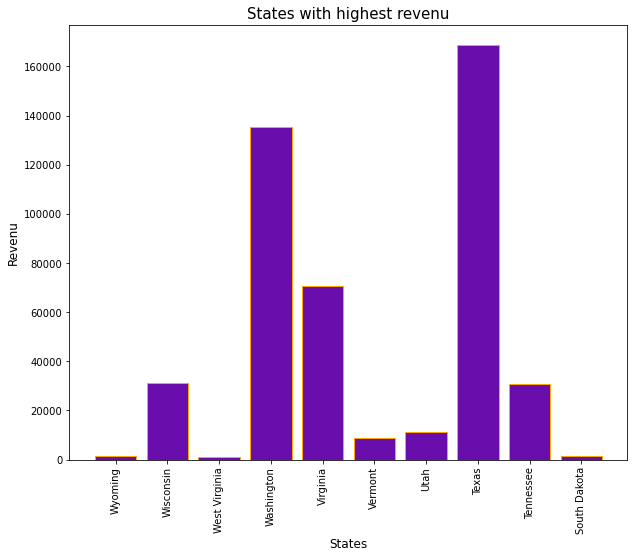

In [14]:
plt.figure(figsize=(10,8))
plt.bar(top_states['State'],top_states['Sales'],color='#6a0dad',edgecolor='orange')
plt.xticks(rotation='vertical')
plt.title('States with highest revenu',fontsize=15)
plt.xlabel('States',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [16]:
top_products=d.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).head(5)
top_products=top_products[['Sales']].round(2)
top_products.reset_index(inplace=True)
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48


Text(0, 0.5, 'Revenu')

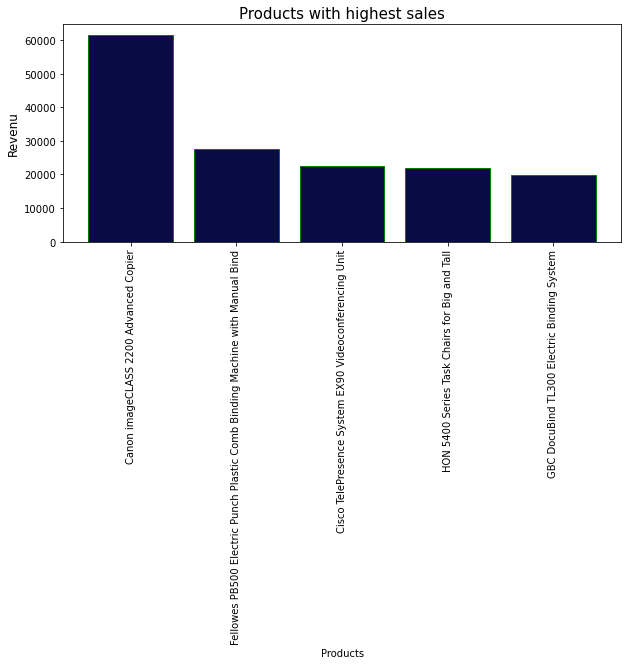

In [33]:
plt.figure(figsize=(10,4))
plt.bar(top_products['Product Name'],top_products['Sales'],color='#080b45',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Products with highest sales',fontsize=15)
plt.xlabel('Products',fontsize=10)
plt.ylabel('Revenu',fontsize=12)

In [4]:
d['Order Date'] = pd.to_datetime(d['Order Date'],format='%d/%m/%Y')
d['Ship Date'] = pd.to_datetime(d['Ship Date'],format='%d/%m/%Y')

In [5]:
d.sort_values(by=['Order Date'],inplace=True)

In [6]:
d['day'] = d['Order Date'].dt.day
d['month'] = d['Order Date'].dt.month
d['year'] = d['Order Date'].dt.year